In [33]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from astropy import units as u
from astropy.coordinates import SkyCoord

In [34]:
bat = pd.DataFrame.from_csv('grb_bat.tsv', sep='\t')

In [35]:
bat = bat.rename(index=str, columns={"Time [UT]": "time", 'Trigger Number': "t_no", 
                                     'BAT RA (J2000)': 'bat_ra', 'BAT Dec (J2000)': 'bat_dec'})

In [36]:
bat = bat.replace("n/a", np.nan)
bat = bat.dropna()

for i in range(len(bat.time)):
    bat.time[i] = str(bat.time[i]).split('.')[0]

In [37]:
bat.count()

time       1185
t_no       1185
bat_ra     1185
bat_dec    1185
dtype: int64

In [38]:
bat['hour'] = pd.to_datetime(bat['time']).dt.hour

a = bat.groupby('hour').t_no.nunique().reset_index()

hour = a['hour'].tolist()
f = a['t_no'].tolist()

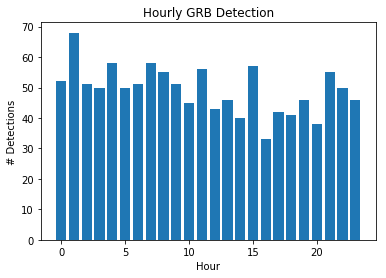

In [39]:
# Bar graph

fig = plt.figure()
 
plt.bar(hour, f)
plt.xlabel('Hour')
plt.ylabel('# Detections')
plt.title('Hourly GRB Detection')

plt.show()

In [44]:
bat_ra = list(map(float, bat['bat_ra'].tolist()))
bat_dec = list(map(float, bat['bat_dec'].tolist()))



c = SkyCoord(ra=bat_ra*u.degree, dec=bat_dec*u.degree)

In [51]:
c.ra.hour

array([  8.4546    ,  22.0082    ,   0.80266667, ...,  11.17826667,
         0.41026667,  10.9862    ])

In [50]:
c.galactic

<SkyCoord (Galactic): (l, b) in deg
    [( 213.15252535,  26.44283363), (  84.86601488, -19.10758427),
     ( 118.97783825, -78.47857395), ..., ( 279.89559782,  24.86781203),
     ( 119.87728414,   0.13444065), ( 268.66357987,  37.34899783)]>

In [57]:
c.representation_type = "cartesian"
a = 

<SkyCoord (ICRS): (x, y, z) [dimensionless]
    [(-0.58718301,  0.78436132,  0.1999836 ),
     ( 0.74439811, -0.42765036,  0.51282222),
     ( 0.94182809,  0.20087907, -0.26945771), ...,
     (-0.8150588 ,  0.17809904, -0.55132557),
     ( 0.45373829,  0.0489232 ,  0.88979103),
     (-0.91805615,  0.24955078, -0.30805409)]>

In [54]:
type(c)

astropy.coordinates.sky_coordinate.SkyCoord

In [55]:
c.to_string()

['126.819 11.536',
 '330.123 30.852',
 '12.04 -15.632',
 '19.211 68.682',
 '149.782 48.254',
 '159.585 -53.555',
 '203.078 62.161',
 '148.273 35.624',
 '212.013 -50.5',
 '293.92 20.597',
 '98.154 -58.689',
 '139.387 -30.523',
 '167.423 -12.599',
 '186.198 32.503',
 '163.774 22.461',
 '278.392 9.118',
 '249.51 -10.206',
 '288.096 22.434',
 '61.683 -2.601',
 '39.26 15.199',
 '236.766 -10.064',
 '34.123 -54.41',
 '135.635 42.93',
 '139.15 52.684',
 '22.08 -11.928',
 '26.84 30.88',
 '215.464 -61.997',
 '167.386 -54.343',
 '128.659 70.805',
 '232.221 -28.251',
 '203.949 -47.088',
 '254.532 34.985',
 '276.189 -40.202',
 '188.713 35.549',
 '94.375 55',
 '201.057 -5.527',
 '187.928 3.664',
 '143.434 -17.348',
 '6.404 -64.781',
 '174.947 -16.312',
 '238.019 70.111',
 '58.901 12.169',
 '150.057 -1.025',
 '34.322 1.962',
 '45.782 47.845',
 '43.122 42.679',
 '231.851 -38.523',
 '191.708 18.298',
 '129.963 -46.585',
 '165.409 56.479',
 '7.358 9.225',
 '342.645 -15.406',
 '286.901 -16.414',
 '121.21

In [60]:
a = np.array(c)

In [82]:
list(map(float, str(c[0]).split('\n')[1].strip()[1:-2].split(',')))

[-0.58718301, 0.78436132, 0.1999836]

In [87]:
coords = []

for i in range(len(c)):
    co = list(map(float, str(c[i]).split('\n')[1].strip()[1:-2].split(',')))
    coords.append(co)

[[-0.58718301, 0.78436132, 0.1999836],
 [0.74439811, -0.42765036, 0.51282222],
 [0.94182809, 0.20087907, -0.26945771],
 [0.34329932, 0.11962338, 0.93157706],
 [-0.57535448, 0.33510633, 0.74610386],
 [-0.55673895, 0.20721529, -0.80442748],
 [-0.42961652, -0.18305203, 0.88426331],
 [-0.69138628, 0.42745909, 0.58246351],
 [-0.53934843, -0.33719249, -0.77162458],
 [0.37954282, -0.85568054, 0.35179264],
 [-0.07370887, 0.51442937, -0.85435907],
 [-0.65392834, 0.5607418, -0.5078842],
 [-0.95250262, 0.21250813, -0.21812621],
 [-0.83843363, -0.09105343, 0.53734377],
 [-0.88732853, 0.25822947, 0.38205448],
 [0.14410075, -0.97679209, 0.15846826],
 [-0.34450517, -0.92191142, -0.1771878],
 [0.28710302, -0.8786005, 0.38161895],
 [0.47386075, 0.87942971, -0.04538042],
 [0.74719864, 0.61070439, 0.26217234],
 [-0.53962677, -0.82356909, -0.17474811],
 [0.48178441, 0.3264747, -0.81320235],
 [-0.52344, 0.51196431, 0.68110433],
 [-0.45855252, 0.39651075, 0.79530423],
 [0.90665155, 0.36778441, -0.20668235],

In [97]:
x = []
y = []
z = []

for i in coords:
    x.append(i[0])
    y.append(i[1])
    z.append(i[2])

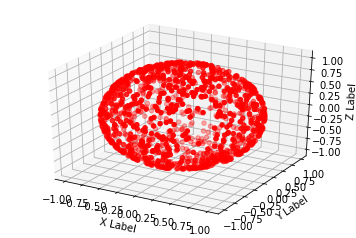

In [98]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()